<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Random-Variables-vs.-Data" data-toc-modified-id="Random-Variables-vs.-Data-1">Random Variables vs. Data</a></span></li><li><span><a href="#Probability-Functions-and-Histograms" data-toc-modified-id="Probability-Functions-and-Histograms-2">Probability Functions and Histograms</a></span></li><li><span><a href="#Histogram-as-Probability-Functions" data-toc-modified-id="Histogram-as-Probability-Functions-3">Histogram as Probability Functions</a></span><ul class="toc-item"><li><span><a href="#Properties-of-Histograms" data-toc-modified-id="Properties-of-Histograms-3.1">Properties of Histograms</a></span></li><li><span><a href="#Estimating-Probabilities" data-toc-modified-id="Estimating-Probabilities-3.2">Estimating Probabilities</a></span></li><li><span><a href="#Checking-Probabilities" data-toc-modified-id="Checking-Probabilities-3.3">Checking Probabilities</a></span></li><li><span><a href="#Histogram-with-$n$-bins" data-toc-modified-id="Histogram-with-$n$-bins-3.4">Histogram with $n$ bins</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.5">Summary</a></span></li></ul></li><li><span><a href="#Resampling-from-Data" data-toc-modified-id="Resampling-from-Data-4">Resampling from Data</a></span><ul class="toc-item"><li><span><a href="#Empirical-CDF" data-toc-modified-id="Empirical-CDF-4.1">Empirical CDF</a></span></li><li><span><a href="#Method-of-Distributions" data-toc-modified-id="Method-of-Distributions-4.2">Method of Distributions</a></span></li><li><span><a href="#Bootstrap-Algorithm" data-toc-modified-id="Bootstrap-Algorithm-4.3">Bootstrap Algorithm</a></span></li><li><span><a href="#Simpler-Bootstrap-Algorithm" data-toc-modified-id="Simpler-Bootstrap-Algorithm-4.4">Simpler Bootstrap Algorithm</a></span></li></ul></li></ul></div>

# PSTAT 234 - Histograms and Distributions <a class='tocSkip'>

# Random Variables vs. Data

**Random Variable: $Y$**
- Suppose $Y\sim f(y)$, and $f(y)$ is the density function
- $f(y)$ analytically defines behavior or $Y$

**Data of $Y$: $y_1, y_2, \dots$**
- Each $y_i$ is one (random) observation of $Y$
- In practice, $f(y)$ is not known
- However, we can estimate $\hat f(y)$ from data
- Histogram $\hat f(y)$ can be considered as the empirical distribution of $Y$

# Probability Functions and Histograms

- In practice, true distribution $f(y)$ is _often unknown_

- However, we can estimate pdf or pmf from data: $\hat f(y)$ or $\hat p(y)$

- Estimated $\hat f(y)$ (estimated pdf) or $\hat p(y)$ (estimated pmf) can be used instead $f(y)$

# Histogram as Probability Functions

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
Y = norm(loc=3, scale=1) # "random variable: Normal(3, 1)"

# analytical density function f(y) of Normal(3, 1)
def f(y): 
    return Y.pdf(y)

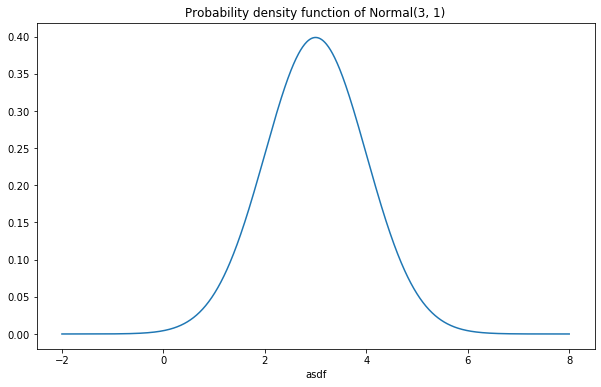

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
y_grid = np.linspace(-2, 8, num=1000) # choose some falues of y
ax.plot(y_grid, f(y_grid))           # plot f(y)
ax.set_title('Probability density function of Normal(3, 1)')
ax.set_xlabel('asdf')
plt.show()

In [4]:
np.random.seed(234)

In [5]:
num_data = 100 # number of observations
num_bins = 20  # number of bins

y_data = Y.rvs(num_data) # "data"

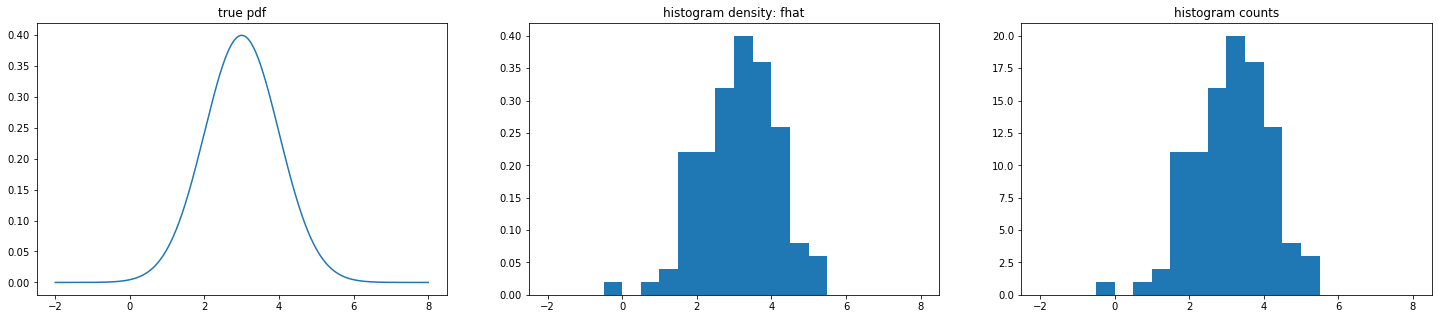

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

ax[0].plot(y_grid, f(y_grid))

bin_edges = np.linspace(-2, 8, num=num_bins+1)
fhat,   bins, patches = ax[1].hist(y_data, density=True,  bins=bin_edges) # density plot
counts, bins, patches = ax[2].hist(y_data, density=False, bins=bin_edges) # counts plot

ax[0].set_title('true pdf'); ax[1].set_title('histogram density: fhat'); ax[2].set_title('histogram counts')
plt.show()

- True pdf is unknown, but we can use the histogram
- Construct approximate continuous or discrete distributions

## Properties of Histograms

In [7]:
assert(len(counts) == num_bins) # check there are indeed `num_bins` of counts
assert(sum(counts) == num_data) # check total counts is equal to `num_data`

In [8]:
sum(fhat) # density does not sum to 1: i.e., cannot be a discrete distribution

2.0

**$\hat f(y)$ is a piecewise constant approximation of $f(y)$**

## Estimating Probabilities

- $\hat f$ approximates $f$ (continuous pdf)
- What can we compute from histogram counts and density values? 

In [9]:
normalize_fhat  = fhat/sum(fhat)          # heights1: just normalizing fhat
fhat_delta      = fhat*np.diff(bin_edges) # heights2: approximating integral with constant height per bin
bin_probability = counts/num_data         # heights3: probability of being in bin

In [10]:
assert(all(np.isclose(normalize_fhat, fhat_delta)))  # heights1 is equal to heights2
assert(all(np.isclose(fhat_delta, bin_probability))) # heights2 is equal to heights3

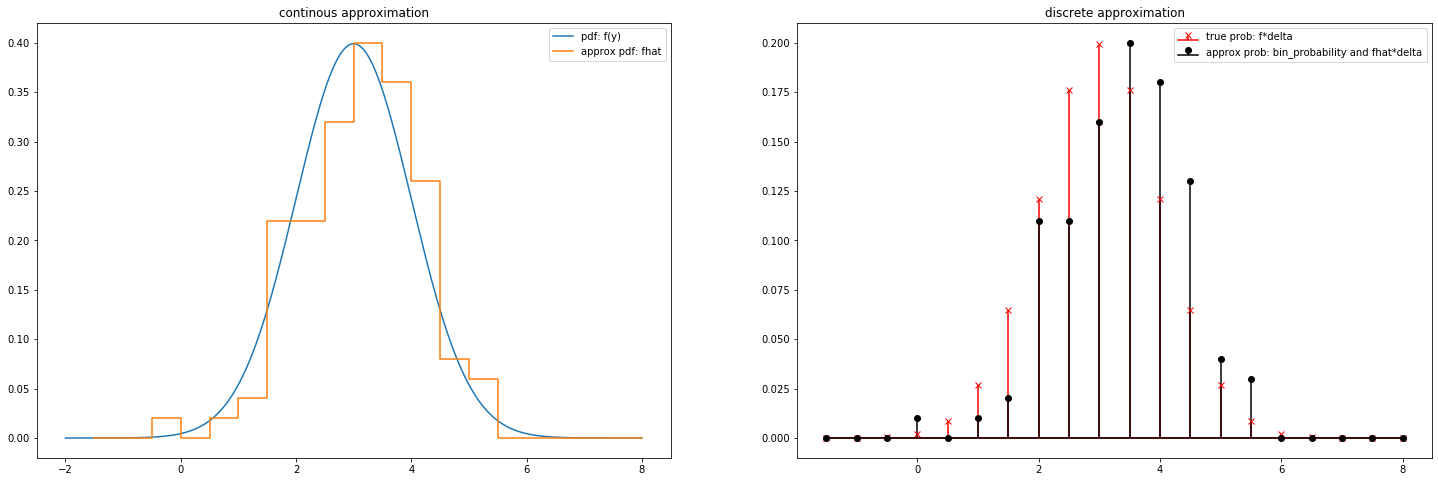

In [11]:
midpoints = bin_edges[:-1] + np.diff(bin_edges)

fig, ax = plt.subplots(1, 2, figsize=(25, 8))

ax[0].plot(y_grid, f(y_grid))                 # true density
ax[0].step(midpoints, fhat)                   # continuous approximation
ax[0].set_title('continous approximation')
ax[0].legend(['pdf: f(y)', 'approx pdf: fhat'])

ax[1].stem(midpoints, f(midpoints)*np.diff(bin_edges), # true probability mass at bin center
           use_line_collection=True, markerfmt='xr', linefmt='r', basefmt='r')
ax[1].stem(midpoints, bin_probability,                 # approximate probability mass at bin center 
           use_line_collection=True, markerfmt='ok', linefmt='k', basefmt='k')
ax[1].set_title('discrete approximation')
ax[1].legend(['true prob: f*delta', 'approx prob: bin_probability and fhat*delta'])

plt.show()

## Checking Probabilities

- Check if approximations are valid probabilities

In [12]:
np.isclose(sum(fhat_delta), 1)

True

- `bin_probabilities` is a pmf
    $$1 = \sum_{b=1}^B \texttt{bin-probabilities}_b = \sum_{b=1}^B \hat p(x_b)$$

## Histogram with $n$ bins

- Suppose total number of bins $B$ is set to $n$

- Each data point $x_i$ has its own histogram bin $i=1,2,\dots,n$ 

- Each histogram bin will have one data point 

- Height of each histogram bin will be $1/n$

- Therefore, $\hat p(x_i) = 1/n$, which implies sample avaerage:
$$\hat E(x) = \frac{1}{n} \sum_{i=1}^n x_i$$

## Summary

- Any distribution can be approximated with a histogram

- Approximation can be continuous or discrete

- $\hat f(y)$ is piecewise constant approximation of continuous pdf (`density=True`)

- $\hat p(y_b)$ is approximate pmf where discrete values are at bin centers 

# Resampling from Data

- Recall our data $y_i$, where $i=1,2,\dots,n$

- How can we "sample from" our empirical distribution that our data represents

- Recall from 120B definition of CDF:
    $$ F(y) = P(Y\leq y) = \int_{-\infty}^y f(z)\, dz $$

In [13]:
def ecdf(data):
    y_ord = np.sort(data)
    n = y_ord.size
    Fhat = np.arange(1, n+1) / n
    
    return y_ord, Fhat

## Empirical CDF 

- Sort data $D$ and let order statistic of $y_i$ be $y_{(i)}$

- We can approximate $F(y)$ with $\hat F(y)$ since
    $$\begin{aligned}
     \hat F(y_{(1)}) &= \hat P(Y\leq y_{(1)}) = 1/n\\
     \hat F(y_{(2)}) &= \hat P(Y\leq y_{(2)}) = 2/n\\
     &\vdots \\
     \hat F(y_{(n)}) &= \hat P(Y\leq y_{(n)}) = n/n = 1\\
    \end{aligned}$$

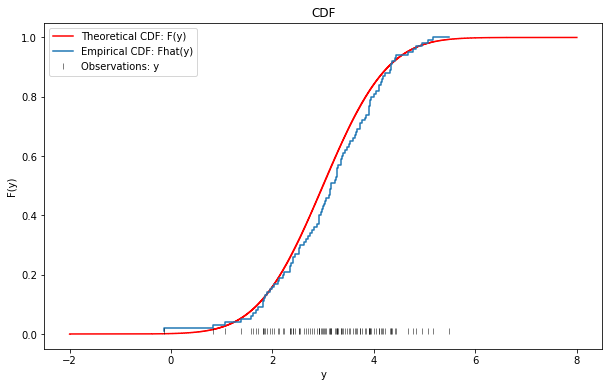

In [14]:
# y_data = Y.rvs(num_data) # new data
y_os, Fhat = ecdf(y_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
ax.step(y_os, Fhat, '-')
ax.plot(y_os, [0.01]*len(y_os), '|', color='k', alpha=0.5)

ax.set_title('CDF')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

## Method of Distributions

- Simulate "new data" (bootstrap data) with one dataset: $D = \{y_1, y_2, \dots, y_n\}$?

- Can simulate $U\sim\text{Uniform}(0,1)$ and apply some operation $g(U) = Y\sim F(y)$?

- Assume invertible $F$ and non-decreasing $g$, we can show,
    $$g(u) = F^{-1}(u)$$

- $F$ is unknown, but we have $\hat F$ (revisit ECDF)

## Bootstrap Algorithm

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample $u_i$ from Uniform(0,1)
    1. $y_i^* = \hat F^{-1}(u_i)$, 
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

## Simpler Bootstrap Algorithm

Given dataset $D$ with $n$ observations,
1. For $i=1,2,\dots,n$
    1. Sample a random integer $i\in [1, n]$
    1. $y^*_i = y_{(i)}$
1. Return $D^* = y^*_1, y^*_2, \dots y^*_n$

![alt text](https://www.inferentialthinking.com/images/chapters/13/2/Bootstrap_25_0.png)

In [15]:
def resample_ecdf(data):
    n = len(data)
    resampled_data = np.random.choice(data, len(data))
    return ecdf(resampled_data)

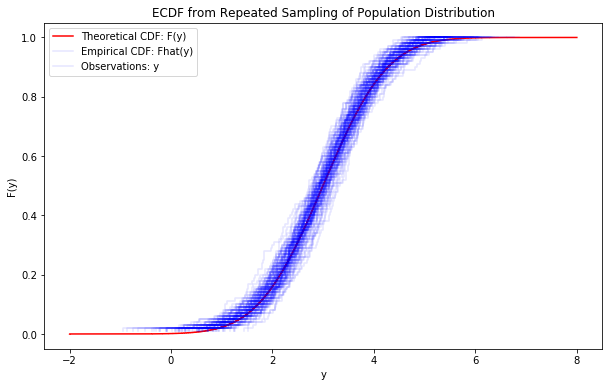

In [16]:
many_independent_ecdfs = [ecdf(Y.rvs(num_data)) for one in range(0, 100)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
for one_ecdf in many_independent_ecdfs:
    ax.step(*one_ecdf, '-b', alpha=0.1)

ax.set_title('ECDF from Repeated Sampling of Population Distribution')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()

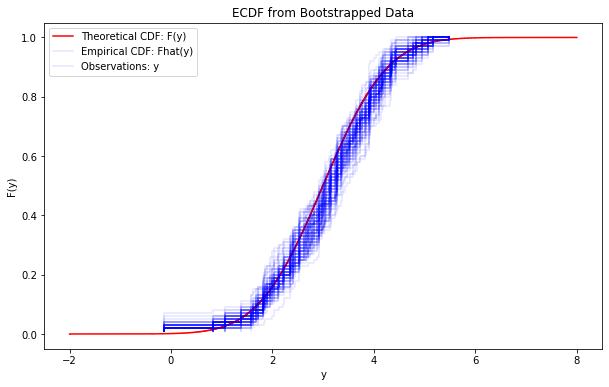

In [17]:
many_resampled_ecdfs = [resample_ecdf(y_data) for one in range(0, 100)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.step(y_grid, Y.cdf(y_grid), '-r')
for one_ecdf in many_resampled_ecdfs:
    ax.step(*one_ecdf, '-b', alpha=0.1)

ax.set_title('ECDF from Bootstrapped Data')
ax.set_xlabel('y')
ax.set_ylabel('F(y)')
ax.legend(['Theoretical CDF: F(y)', 'Empirical CDF: Fhat(y)', 'Observations: y'])
plt.show()